<a href="https://colab.research.google.com/github/2019mohamed/Manifolds-experiments/blob/main/tangant_preserve_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install geomstats

     |████████████████████████████████| 9.5 MB 5.2 MB/s 
     |████████████████████████████████| 294 kB 57.2 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


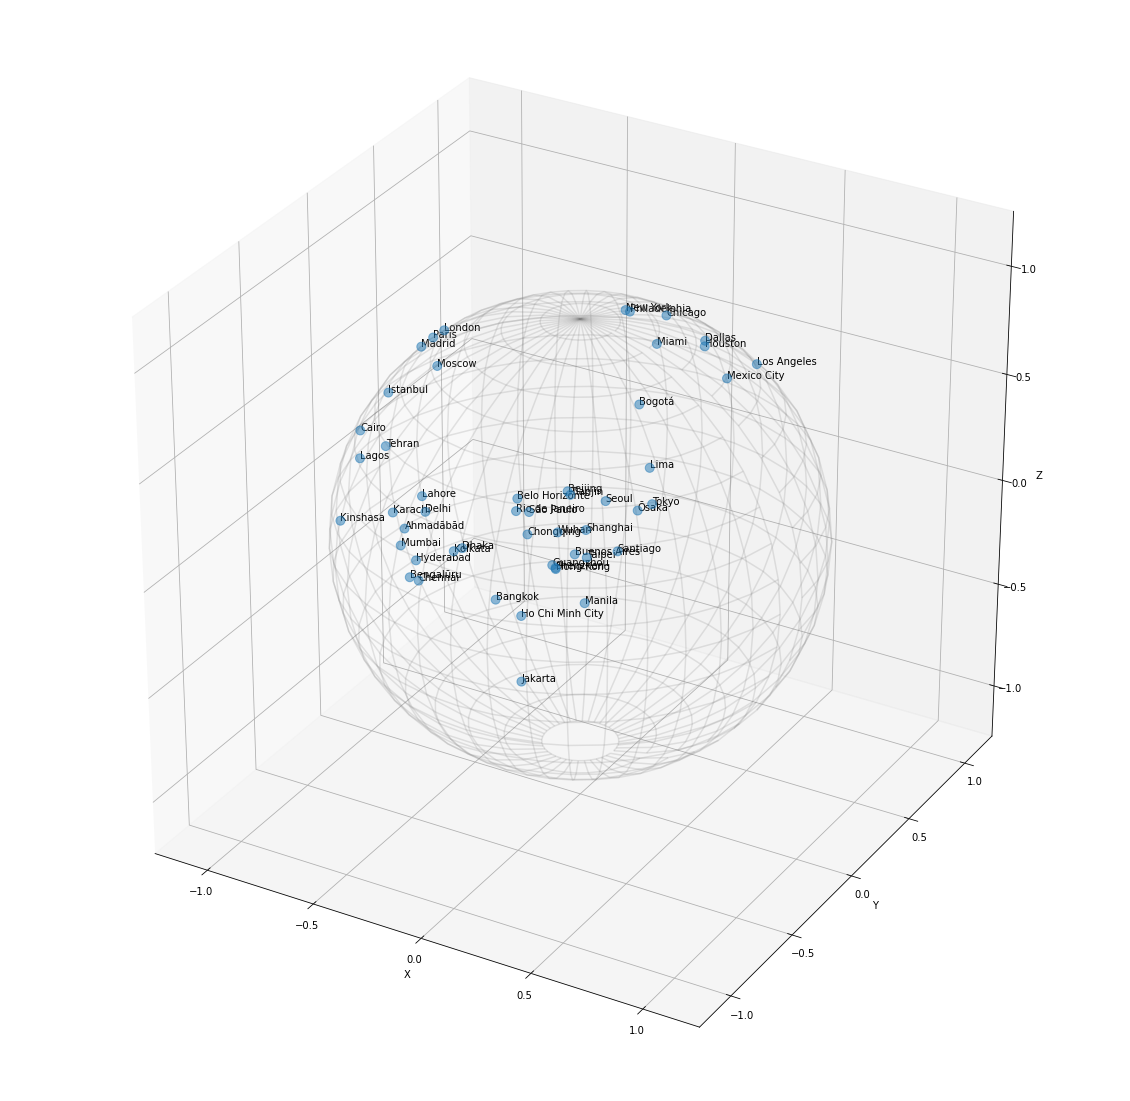

In [47]:
import geomstats as gs
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere , HypersphereMetric
import geomstats.datasets.utils as data_utils

data, names = data_utils.load_cities()
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
visualization.plot(data, ax =ax,space='S2', label=names, s=80, alpha=0.5)



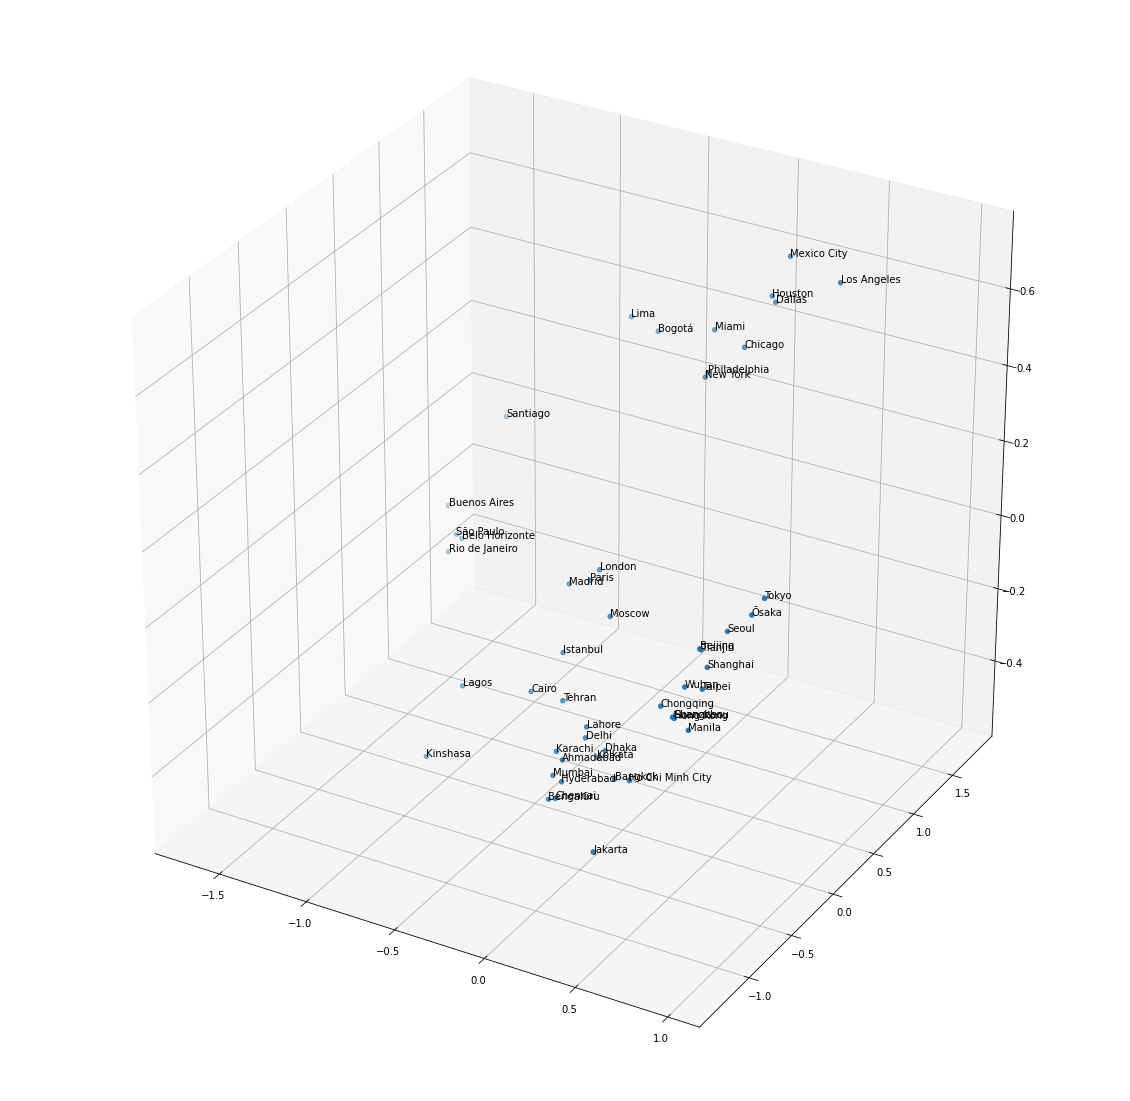

True


In [67]:
x = np.array([[1,2,3] , [0,0,0]])
paris = data[19]
sphere = Hypersphere(dim=2)
tangent_vector = sphere.to_tangent(x, base_point=paris)

from geomstats.learning.preprocessing import ToTangentSpace
from mpl_toolkits.mplot3d import Axes3D

tangent_vectors = ToTangentSpace(geometry= sphere).fit_transform(data)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d') 
ax.scatter(tangent_vectors[:,0] , tangent_vectors[:,1] , tangent_vectors[: , 2])
for i, v in enumerate(tangent_vectors):
  ax.text(tangent_vectors[i,0],tangent_vectors[i,1],tangent_vectors[i,2],  names[i])
plt.show()

from scipy.spatial.distance import cdist
D_euld = cdist(tangent_vectors, tangent_vectors)

sphere_dis = HypersphereMetric(dim = 2)
D_sphere=list(sphere_dis.dist(data[0] , v) for v in data)

def distance_eps (arr1 , arr2 , eps):
  for u,v in zip(arr1 , arr2):
    if abs(u - v) > eps:
      return False
    
  return True

print(distance_eps( D_sphere, D_euld[0] , 0.6))